# 1
Due to large sizes of data sets in practice one need to do dimension reduction thereafter
study the pattern by various clusterings techniques. Dimension reduction means lost
of certain information whence less accuracy of clustering results in general. In this
question, we consider the Iris data set as four dimensional data set with the ground
truce lab el: setosa, versicolor, virginica and use the k-means for clustering.

In [38]:
from sklearn import datasets
import numpy as np

df = datasets.load_iris(as_frame=True)
features = df.data
target = df.target.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

## a)
First determine three clusters of Iris data set by k-means, and even compute the percentage of correct classied observations.

In [39]:
from sklearn.cluster import KMeans
np.random.seed(1)

kmeans_a = KMeans(n_clusters=3).fit(X=features)
pred_a = kmeans_a.predict(features)

pred_a

c:\Users\ap9169\eda-exam\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [40]:
# matrix of clusters with target
import pandas as pd
confusion_a = pd.DataFrame({'true': target, 'cluster': pred_a})
confusion_a = confusion_a.value_counts().unstack(fill_value=0)
confusion_a.columns = ['Cluster ' + str(i+1) for i in confusion_a.columns]
confusion_a.loc['Total'] = confusion_a.sum()
confusion_a

Cluster 1  Cluster 2  Cluster 3
true                                       
setosa              0         50          0
versicolor         47          0          3
virginica          14          0         36
Total              61         50         39

In [41]:
# percentages
conf_a_perc = confusion_a.copy()
conf_a_perc["Cluster 1"] = np.round(conf_a_perc["Cluster 1"] / conf_a_perc.loc["Total", "Cluster 1"], 2)
conf_a_perc["Cluster 2"] = np.round(conf_a_perc["Cluster 2"] / conf_a_perc.loc["Total", "Cluster 2"], 2)
conf_a_perc["Cluster 3"] = np.round(conf_a_perc["Cluster 3"] / conf_a_perc.loc["Total", "Cluster 3"], 2)
conf_a_perc

Cluster 1  Cluster 2  Cluster 3
true                                       
setosa           0.00        1.0       0.00
versicolor       0.77        0.0       0.08
virginica        0.23        0.0       0.92
Total            1.00        1.0       1.00

## b) 
Now apply first the factor analysis metho d to reduce the Iris data set to two
dimensional, then determine three clusters of the reduce data set by k-means.
What is then the p ercentage of correct classified observations ? Even visualize the
reduced data set with original lab el resp ectively by the clustering.

In [42]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2).fit_transform(features)
fa

array([[-1.32761727e+00, -5.61310764e-01],
       [-1.33763854e+00, -2.79764907e-03],
       [-1.40281483e+00,  3.06349492e-01],
       [-1.30104274e+00,  7.18826835e-01],
       [-1.33342439e+00, -3.64588985e-01],
       [-1.14667134e+00, -1.04228193e+00],
       [-1.35307178e+00,  5.74473558e-01],
       [-1.27940722e+00, -2.33129838e-01],
       [-1.36530876e+00,  1.12229944e+00],
       [-1.28651978e+00,  4.72301660e-02],
       [-1.25777170e+00, -1.18508651e+00],
       [-1.23700429e+00,  2.91772867e-01],
       [-1.34543381e+00,  2.06818259e-01],
       [-1.53401771e+00,  1.05544473e+00],
       [-1.39682229e+00, -2.38993243e+00],
       [-1.23819458e+00, -1.98969103e+00],
       [-1.36091949e+00, -1.37946760e+00],
       [-1.32540156e+00, -5.50623528e-01],
       [-1.13192081e+00, -1.69029724e+00],
       [-1.27252223e+00, -5.37071207e-01],
       [-1.14996491e+00, -9.45749580e-01],
       [-1.27007895e+00, -5.02802605e-01],
       [-1.56999078e+00,  1.79437924e-01],
       [-1.

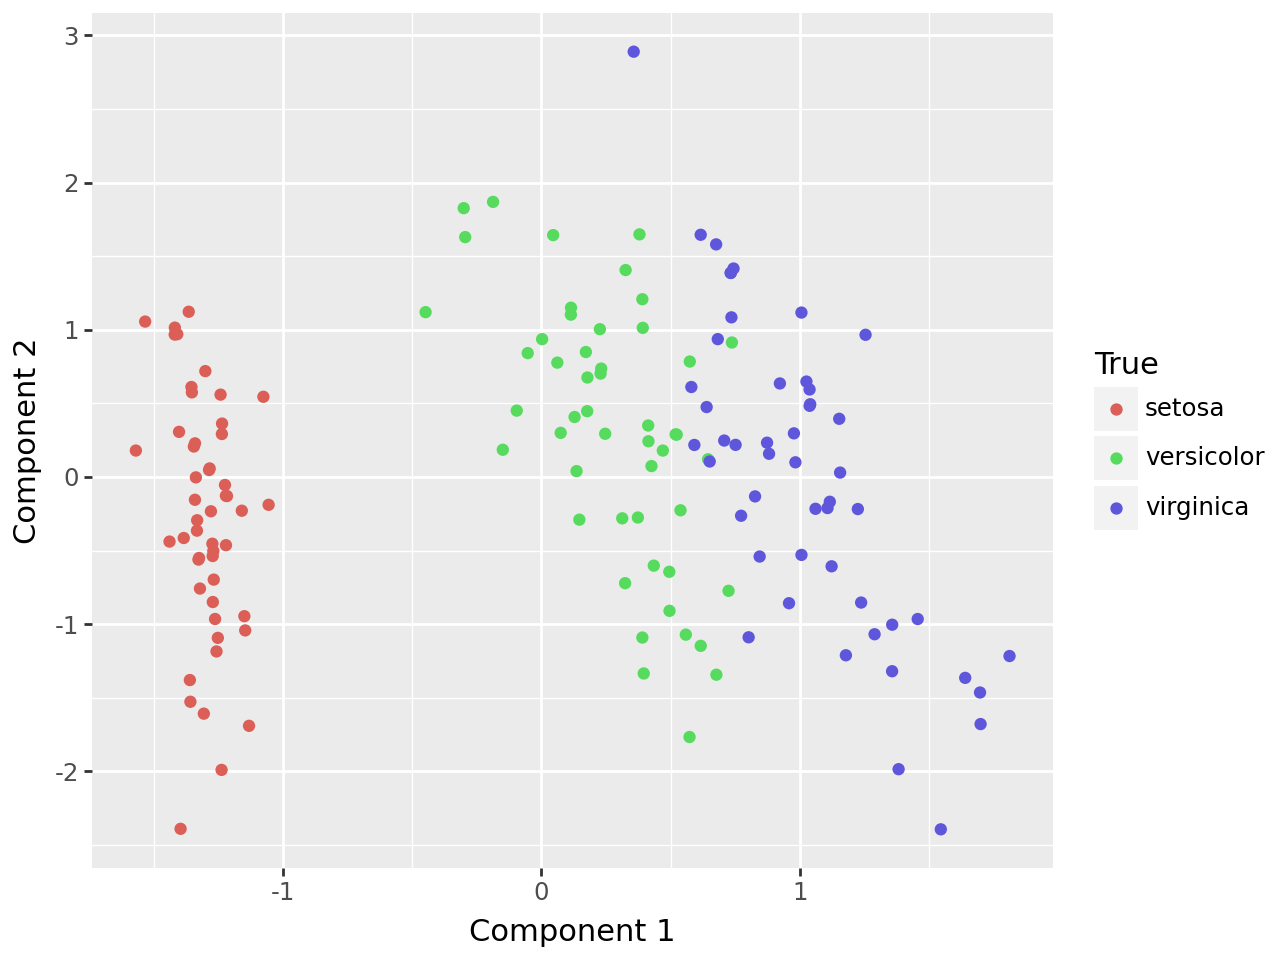

In [43]:
from plotnine import *
fa_df = pd.DataFrame(fa, columns=['Component 1', 'Component 2'])
fa_df["True"] = target

(
  ggplot(aes(x='Component 1', y='Component 2', color='True'), fa_df) +
  geom_point() 
)

In [51]:
np.random.seed(1)
kmeans_b = KMeans(n_clusters=3).fit(X=fa)
pred = kmeans_b.predict(fa)
confusion_b = pd.DataFrame({'true': target, 'cluster': pred})
confusion_b = confusion_b.value_counts().unstack(fill_value=0)
confusion_b.columns = ['Cluster ' + str(i+1) for i in confusion_b.columns]
confusion_b.loc['Total'] = confusion_b.sum()
def add_perc_to_conf(confusion_matrix):
  """
  Merge confusion matrices by combining total and percentage values into a single string.

  Parameters:
  confusion_matrix (pd.DataFrame): DataFrame containing total counts for each cluster.

  Returns:
  pd.DataFrame: Merged DataFrame with combined total and percentage values.
  """
  percentages_matrix = confusion_matrix.copy()
  for cluster in confusion_matrix.columns:
    percentages_matrix[cluster] = np.round(
      confusion_matrix[cluster] / confusion_matrix.loc["Total", cluster], 2
    )
  
  merged = confusion_matrix.merge(percentages_matrix, on="true", suffixes=('_total', '_perc'))
  cluster_columns = [col for col in confusion_matrix.columns if col.startswith("Cluster")]
  for cluster in cluster_columns:
    merged[cluster] = merged[f"{cluster}_total"].astype(str) + " (" + merged[f"{cluster}_perc"].astype(str) + ")"
  return merged[cluster_columns]

confusion_b_perc = add_perc_to_conf(confusion_b)
confusion_b_perc

c:\Users\ap9169\eda-exam\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


Cluster 1 Cluster 2  Cluster 3
true                                      
setosa        0 (0.0)  50 (1.0)    0 (0.0)
versicolor  15 (0.38)   0 (0.0)  35 (0.57)
virginica   24 (0.62)   0 (0.0)  26 (0.43)
Total        39 (1.0)  50 (1.0)   61 (1.0)

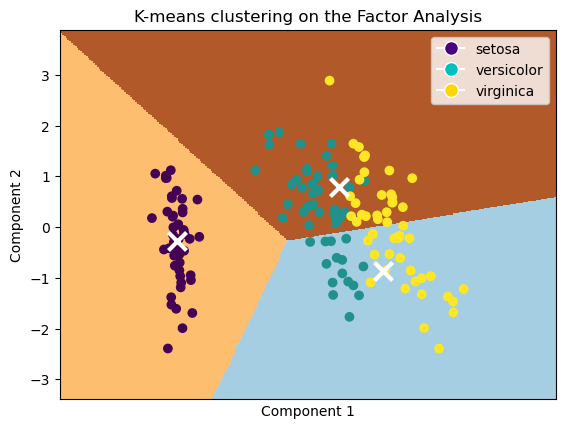

In [9]:
import matplotlib.pyplot as plt

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = fa[:, 0].min() - 1, fa[:, 0].max() + 1
y_min, y_max = fa[:, 1].min() - 1, fa[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_b.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

# Plot the centroids as a white X
centroids = kmeans_b.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
# add color to each point as the true
plt.scatter(fa[:, 0], fa[:, 1], c=target.map({'setosa': 0, 'versicolor': 1, 'virginica': 2}))
# add legend to this last scatter
# https://i.pinimg.com/originals/84/7f/51/847f5100d01c7d1896d287377fea7308.png
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='setosa', markerfacecolor='indigo', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='versicolor', markerfacecolor='c', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='virginica', markerfacecolor='gold', markersize=10)])

plt.title("K-means clustering on the Factor Analysis")
plt.xticks(())
plt.show()

# 2
Consider the minimum spanning trees method (MST) and lung cancer data set LungA

In [2]:
from pyprojroot import here
import scipy.io
mat = scipy.io.loadmat(here("data/lungA.mat"))
mat


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat Sep 20 10:56:35 2003',
 '__version__': '1.0',
 '__globals__': [],
 'labA': array([[array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         a

In [5]:
import pandas as pd
import numpy as np
labA = pd.DataFrame(np.transpose(mat["labA"]))
labA.columns = ["label"]
labA["label"] = labA["label"].astype(str)
labA["label"] = labA["label"].str.extract(r"'(.*?)'")
labA.value_counts()

label
AD       139
SQ        21
COID      20
NL        17
SMCL       6
Name: count, dtype: int64

In [6]:
lungA = pd.DataFrame(mat["lungA"].T)
lungA

0       1       2      3        4        5       6        7     \
0    -7.270 -82.480 -29.920  -1.60  145.190   24.300 -12.930  -72.780   
1    13.370 -40.780 -37.590   8.06   60.080   22.920 -22.730  -17.420   
2     5.975 -61.405 -10.255  -8.70   95.710    4.325   3.720  145.805   
3    21.135 -57.600 -36.220  14.85   57.705   26.345 -17.015   45.415   
4    -4.010 -55.690 -24.270 -10.09   40.550    1.060 -14.140   59.780   
..      ...     ...     ...    ...      ...      ...     ...      ...   
198  80.850 -35.040  -3.220  51.46  247.450  155.150   9.020   49.010   
199  37.000 -87.870 -50.570 -29.05  103.130   -7.520 -37.660  -33.350   
200  38.160 -75.280 -74.410   1.77  134.420   13.900   4.370    6.970   
201  41.590 -73.940 -25.090  26.47  135.970   55.820 -10.870  -25.980   
202  32.940 -83.340 -45.810  -8.98  182.880   17.760 -45.090  -36.420   

        8        9     ...     3302     3303    3304     3305     3306  \
0    491.030   73.740  ...   85.910   39.690  228.22  345.050   57.520   
1    520.140   64.330  ...  201.220   34.600  373.74   36.730   21.860   
2    194.225   87.145  ...  150.675   28.335  207.41  346.665   56.415   
3    207.105  115.170  ...  162.120   19.370  235.45  396.205   64.295   
4    644.440  102.270  ...   64.840    6.120  149.77  211.360  -23.260   
..       ...      ...  ...      ...      ...     ...      ...      ...   
198  516.810  209.060  ...  175.570   65.340  338.93  271.140  115.140   
199  345.700   42.030  ...   63.590   -3.930  228.52  171.540    3.250   
200  345.510  129.220  ...  215.160  154.380  216.03  221.240  148.310   
201  510.570  154.690  ...  191.250   54.930  219.81  425.470  134.190   
202  335.750  -17.650  ...  242.470    1.860  314.59  503.450  177.080   

        3307     3308     3309    3310     3311  
0     59.140  592.960  137.870  199.70   52.660  
1     15.490  483.350  140.760   79.20  109.980  
2     35.820  773.845  140.430   85.72  102.410  
3     -3.025  482.205  250.585  138.40  109.785  
4     -9.070  625.540  112.380  101.26   56.740  
..       ...      ...      ...     ...      ...  
198  146.170  805.230  155.150  215.60  149.440  
199   68.620  761.970  104.570  121.12  227.070  
200  -59.700  654.680  112.730   83.24  108.390  
201   62.940  795.530  178.770  146.66  298.420  
202  119.060  959.860  127.760   83.58  133.560  

[203 rows x 3312 columns]

## a)
First apply MST to find two clusters, then find the percentage of correct clustered
genes using the original label of cancer cell: Normal, Cancer (Small-cell lung
carcinomas, Nonsmall cell lung carcinomas) as ground truth.

In [7]:
# apply label changes
"""
label
AD       139
SQ        21
COID      20
NL        17
SMCL       6
Name: count, dtype: int64
"""
labels_a = labA["label"].map({"NL": "Normal", "AD": "Cancer", "SQ": "Cancer", "COID": "Cancer", "SMCL": "Cancer"})
labels_a.value_counts()

label
Cancer    186
Normal     17
Name: count, dtype: int64

In [8]:
from itertools import combinations
from scipy.sparse import csr_array
from scipy.sparse.csgraph import minimum_spanning_tree as mst


def make_graph(dataset):
  csgraph = np.zeros((dataset.shape[0], dataset.shape[0]))
  for row1, row2 in combinations(dataset.iterrows(), 2):
    id1, obs1 = row1
    id2, obs2 = row2
    dist = np.linalg.norm(obs1 - obs2)
    csgraph[id1, id2] = dist
    # csgraph[id2, id1] = dist # not needed since mst only takes undirected 
  return csr_array(csgraph)

G = make_graph(lungA)
G

<Compressed Sparse Row sparse array of dtype 'float64'
	with 20503 stored elements and shape (203, 203)>

In [9]:
pd.DataFrame(G.toarray())

0             1             2             3             4    \
0    0.0  17539.630039  12537.332224  17612.585056  13941.014152   
1    0.0      0.000000  10639.033109  11187.214380   9989.505821   
2    0.0      0.000000      0.000000  12336.390358   8414.425969   
3    0.0      0.000000      0.000000      0.000000   9320.547495   
4    0.0      0.000000      0.000000      0.000000      0.000000   
..   ...           ...           ...           ...           ...   
198  0.0      0.000000      0.000000      0.000000      0.000000   
199  0.0      0.000000      0.000000      0.000000      0.000000   
200  0.0      0.000000      0.000000      0.000000      0.000000   
201  0.0      0.000000      0.000000      0.000000      0.000000   
202  0.0      0.000000      0.000000      0.000000      0.000000   

              5             6             7             8             9    \
0    17015.996017  15572.684618  15294.190827  15556.702890  17687.603431   
1    11134.235136  11192.436576  13086.285673  10791.329640  10354.344820   
2    11902.488347  10798.138764  11790.441214  10685.494839  11620.584651   
3    10269.389888   9580.926413  13108.662564  10951.477077   9577.099498   
4     9049.699658   9275.235410  10788.507028  10119.409725   8557.977144   
..            ...           ...           ...           ...           ...   
198      0.000000      0.000000      0.000000      0.000000      0.000000   
199      0.000000      0.000000      0.000000      0.000000      0.000000   
200      0.000000      0.000000      0.000000      0.000000      0.000000   
201      0.000000      0.000000      0.000000      0.000000      0.000000   
202      0.000000      0.000000      0.000000      0.000000      0.000000   

     ...           193           194           195           196  \
0    ...  18245.025304  17909.890860  18619.843705  20749.283498   
1    ...  27554.902024  27532.760786  27466.316001  29643.228082   
2    ...  24409.595426  24601.091720  24382.281715  26791.214366   
3    ...  27228.014936  26935.362279  26982.129013  29150.036112   
4    ...  25400.961126  25207.259698  25134.979245  27532.092182   
..   ...           ...           ...           ...           ...   
198  ...      0.000000      0.000000      0.000000      0.000000   
199  ...      0.000000      0.000000      0.000000      0.000000   
200  ...      0.000000      0.000000      0.000000      0.000000   
201  ...      0.000000      0.000000      0.000000      0.000000   
202  ...      0.000000      0.000000      0.000000      0.000000   

              197           198           199           200           201  \
0    21036.964384  18538.818290  18277.605009  17913.536658  14920.037060   
1    29859.366207  28100.465224  26228.020410  27144.024307  18891.928769   
2    26987.512228  25136.998460  23249.785208  24133.200489  16220.603246   
3    29360.669748  27612.927626  26026.759286  26889.227447  17957.748092   
4    27658.675499  25789.438588  23958.976613  25073.069253  15758.539728   
..            ...           ...           ...           ...           ...   
198      0.000000      0.000000  12998.180468  14271.886485  18143.074626   
199      0.000000      0.000000      0.000000  15684.489885  18924.759564   
200      0.000000      0.000000      0.000000      0.000000  18986.412203   
201      0.000000      0.000000      0.000000      0.000000      0.000000   
202      0.000000      0.000000      0.000000      0.000000      0.000000   

              202  
0    20783.482885  
1    29671.849786  
2    26695.610513  
3    29107.767427  
4    27496.524395  
..            ...  
198  15430.687262  
199  15324.921936  
200  16682.754058  
201  20854.606584  
202      0.000000  

[203 rows x 203 columns]

In [32]:
mst_result = mst(G).toarray()
pd.DataFrame(mst_result)

0    1    2    3    4    5    6    7    8    9    ...  193  194  195  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
200  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
201  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
202  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     196  197  198  199  200  201  202  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
200  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
201  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
202  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[203 rows x 203 columns]

In [ ]:
ind = np.unravel_index(np.argmax(mst_result), mst_result.shape)
(ind, mst_result[ind])

((np.int64(186), np.int64(191)), np.float64(15086.309296773028))

In [ ]:
from scipy.sparse.csgraph import connected_components


mst_2_clusts_a = mst_result.copy()
mst_2_clusts_a[ind] = 0

num_clusts, labels = connected_components(mst_2_clusts_a, directed=False)
num_clusts

2

In [16]:
pd.DataFrame(labels).value_counts()

0
0    202
1      1
Name: count, dtype: int64

In [27]:
cancer_normal = pd.DataFrame({"True": labels_a, "Cluster": labels}).value_counts().unstack(fill_value=0)
cancer_normal.columns = ["Cluster 1", "Cluster 2"]
cancer_normal.loc["Total"] = cancer_normal.sum()
cancer_normal

Cluster 1  Cluster 2
True                        
Cancer        185          1
Normal         17          0
Total         202          1

In [29]:
# percentages
cancer_normal_perc = cancer_normal.copy()
cancer_normal_perc["Cluster 1"] = np.round(cancer_normal_perc["Cluster 1"] / cancer_normal_perc.loc["Total", "Cluster 1"], 2)
cancer_normal_perc["Cluster 2"] = np.round(cancer_normal_perc["Cluster 2"] / cancer_normal_perc.loc["Total", "Cluster 2"], 2)
cancer_normal_perc

Cluster 1  Cluster 2
True                        
Cancer       0.92        1.0
Normal       0.08        0.0
Total        1.00        1.0

## b
Apply MST once again to nd three clusters, then compare the correct cluste-
red genes using the original label: Nonsmall cell lung carcinomas, Normal,
Small-cell lung carcinomas as ground truth.

In [61]:
"""
label
AD       139
SQ        21
COID      20
NL        17
SMCL       6
Name: count, dtype: int64
"""
labels_b = labA["label"].map({"NL": "Normal", "AD": "Nonsmall cell lung carcinomas", "SQ": "Nonsmall cell lung carcinomas", "COID": "Nonsmall cell lung carcinomas", "SMCL": "Small-cell lung carcinomas"})
graph_b = mst_result.copy()
for _ in range(2):
  ind = np.unravel_index(np.argmax(graph_b), graph_b.shape)
  graph_b[ind] = 0
_, clust_result = connected_components(graph_b, directed=False)
result = pd.DataFrame({"true": labels_b, "cluster": clust_result}).value_counts().unstack(fill_value=0)
# rename columns
result.columns = ["Cluster 1", "Cluster 2", "Cluster 3"]
# add total
result.loc["Total"] = result.sum()
add_perc_to_conf(result)

Cluster 1 Cluster 2 Cluster 3
true                                                         
Nonsmall cell lung carcinomas  178 (0.89)   1 (1.0)   1 (1.0)
Normal                          17 (0.08)   0 (0.0)   0 (0.0)
Small-cell lung carcinomas       6 (0.03)   0 (0.0)   0 (0.0)
Total                           201 (1.0)   1 (1.0)   1 (1.0)

## c)Finally, test to nd ve clusters comparing the correct clustered genes using the
label: AD, COID, SQ, NL, SCLC as ground truth. Even comment on these clus-
tering results.


In [62]:
labels_c = labA["label"]

graph_c = mst_result.copy()
for _ in range(3):
  ind = np.unravel_index(np.argmax(graph_c), graph_c.shape)
  graph_c[ind] = 0
_, clust_result = connected_components(graph_c, directed=False)
result = pd.DataFrame({"true": labels_c, "cluster": clust_result}).value_counts().unstack(fill_value=0)
# rename columns
result.columns = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]
# add total
result.loc["Total"] = result.sum()
add_perc_to_conf(result)

Cluster 1 Cluster 2 Cluster 3 Cluster 4
true                                          
AD     138 (0.7)   1 (1.0)   0 (0.0)   0 (0.0)
COID   16 (0.08)   0 (0.0)   3 (1.0)   1 (1.0)
NL     17 (0.09)   0 (0.0)   0 (0.0)   0 (0.0)
SMCL    6 (0.03)   0 (0.0)   0 (0.0)   0 (0.0)
SQ     21 (0.11)   0 (0.0)   0 (0.0)   0 (0.0)
Total  198 (1.0)   1 (1.0)   3 (1.0)   1 (1.0)

# 3
Model based clustering in chapter 6 (section 6.5) is based on geometrical prop erties of
clusters, e.g. balls and ellipsoids in 3-dim. In this question, you are asked to randomly
generate data sets to check the capability of MBC: two balls of different sizes, two
ellipsoids of different size with symmetry axis parallel with co ordinates axis, three
ellipsoids also different sizes with arbitrary symmetry axis
## a
Randomly generate those sub data sets so that they are disjoint (far away from
each other), then apply mo del based clustering to n clusters even compare the
estimated clusters with original lab els

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px

def generate_ellipsoid_points(xc, yc, zc, xr, yr, zr, N=100, alpha=0, beta=0, gamma=0):
  """
  (xc, yc, zc) - center of the ellipsoid
  (xr, yr, zr) - radii of the ellipsoid
  N - number of points
  alpha, beta, gamma - angles of rotation (in radians, use np.radians)
  """
  u = np.random.rand(N)
  v = np.random.rand(N)
  
  theta = np.arccos(2*u - 1)
  phi = 2 * np.pi * v
  
  x = xr * np.sin(theta) * np.cos(phi)
  y = yr * np.sin(theta) * np.sin(phi)
  z = zr * np.cos(theta)
  points = np.column_stack((x, y, z))
  
  Rx = np.array([[1, 0, 0],
           [0, np.cos(alpha), -np.sin(alpha)],
           [0, np.sin(alpha), np.cos(alpha)]])
  Ry = np.array([[np.cos(beta), 0, np.sin(beta)],
           [0, 1, 0],
           [-np.sin(beta), 0, np.cos(beta)]])
  Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
           [np.sin(gamma), np.cos(gamma), 0],
           [0, 0, 1]])
  R = Rz @ Ry @ Rx

  rotated_points = points @ R.T
  rotated_points[:, 0] += xc
  rotated_points[:, 1] += yc
  rotated_points[:, 2] += zc
  return rotated_points

arr = generate_ellipsoid_points(0,0,0, 3,2,1, 10000, np.radians(30), np.radians(45), np.radians(60))

df = pd.DataFrame(arr, columns=["x", "y", "z"])
fig = px.scatter_3d(df, x='x', y='y', z='z', color='z', size_max=5)
fig.show()
